# Occupations - Data Visualization

In [6]:
!pip3 install nltk

import pandas as pd
from collections import Counter
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import string

data_URL = 'https://raw.githubusercontent.com/Ariamestra/Occupations/main/Occupations/occupations.csv'

df = pd.read_csv(data_URL)
print(f"Shape: {df.shape}")
df.head()



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Shape: (1016, 3)


,Code,Occupation,Job Family
0,13-2011.00,Accountants and Auditors,Business and Financial Operations
1,27-2011.00,Actors,"Arts, Design, Entertainment, Sports, and Media"
2,15-2011.00,Actuaries,Computer and Mathematical
3,29-1291.00,Acupuncturists,Healthcare Practitioners and Technical
4,29-1141.01,Acute Care Nurses,Healthcare Practitioners and Technical


In [7]:
# Print the column names
print(f"Columns: {df.columns}")

Columns: Index(['Code', 'Occupation', 'Job Family'], dtype='object')


In [8]:
# Get summary of the DataFrame
print(f"Info: {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Code        1016 non-null   object
 1   Occupation  1016 non-null   object
 2   Job Family  1016 non-null   object
dtypes: object(3)
memory usage: 23.9+ KB
Info: None


In [9]:
# Check for the number of missing values in each column
print("Find all of the nulls:")
print(df.isnull().sum())

Find all of the nulls:
Code          0
Occupation    0
Job Family    0
dtype: int64


In [13]:
# Get the statistical summary of ratings
print("Describe the occupations:")
print(df['Occupation'].describe())
print()
print("Describe the job family:")
print(df['Job Family'].describe())

Describe the occupations:
count                         1016
unique                        1016
top       Accountants and Auditors
freq                             1
Name: Occupation, dtype: object

Describe the job family:
count           1016
unique            23
top       Production
freq             114
Name: Job Family, dtype: object


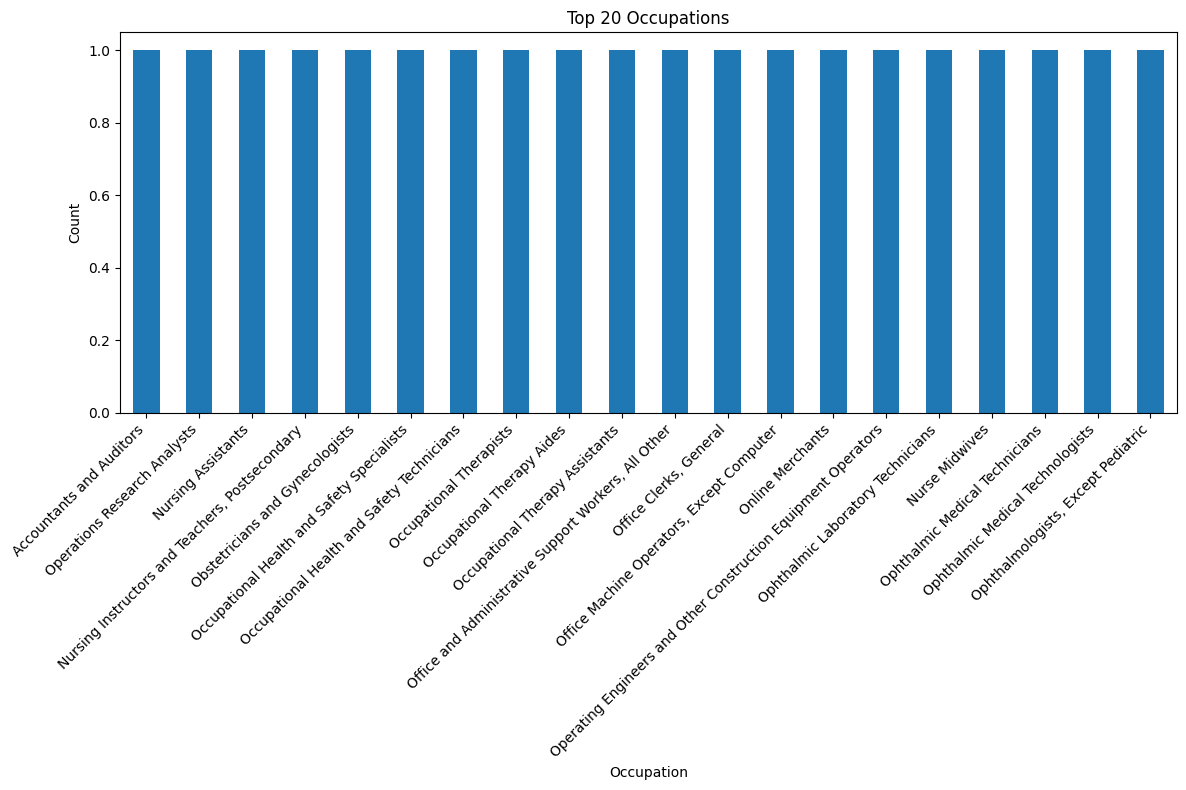

In [22]:
# Count the occurrences of each occupation
occupation_counts = df['Occupation'].value_counts()

# Show only the top 20 occupations for better readability
top_n = 20
top_occupations = occupation_counts.nlargest(top_n)

# Create a bar graph
plt.figure(figsize=(12, 8))
top_occupations.plot(kind='bar')
plt.title('Top 20 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots

# Display the bar graph
plt.show()

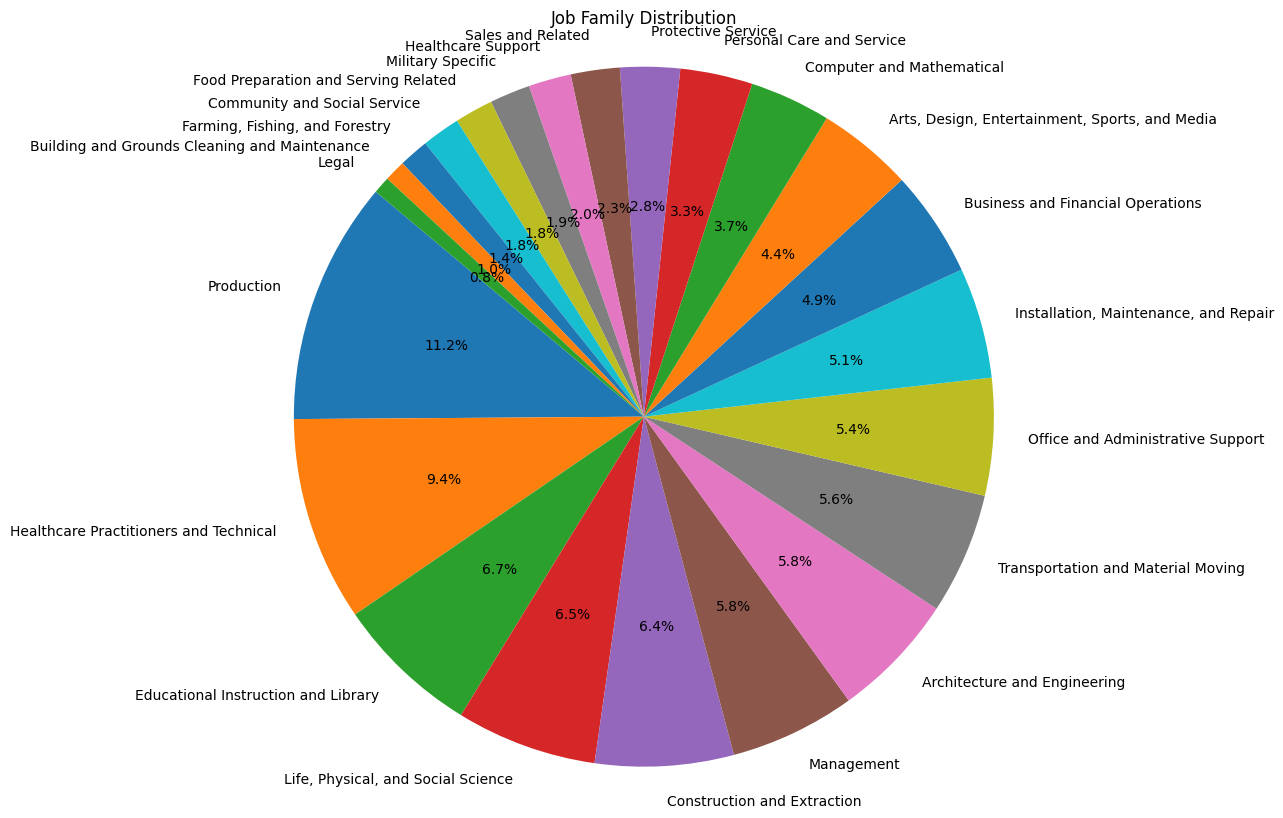

In [23]:
# Count the occurrences of each job family
job_family_counts = df['Job Family'].value_counts()

# Create a pie chart
plt.figure(figsize=(12, 10))
plt.pie(job_family_counts, labels=job_family_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Family Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

# classification

In [24]:
!pip install pandas scikit-learn matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Extract features and target
X = df['Occupation']
y = df['Job Family']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the occupation names using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Accuracy: 0.5637254901960784
                                                precision    recall  f1-score   support

                  Architecture and Engineering       0.81      0.81      0.81        16
Arts, Design, Entertainment, Sports, and Media       0.30      0.38      0.33         8
 Building and Grounds Cleaning and Maintenance       0.00      0.00      0.00         2
             Business and Financial Operations       0.22      0.22      0.22         9
                  Community and Social Service       0.50      0.20      0.29         5
                     Computer and Mathematical       1.00      0.25      0.40         8
                   Construction and Extraction       0.62      0.33      0.43        15
           Educational Instruction and Library       0.93      0.81      0.87        16
                Farming, Fishing, and Forestry       0.0

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


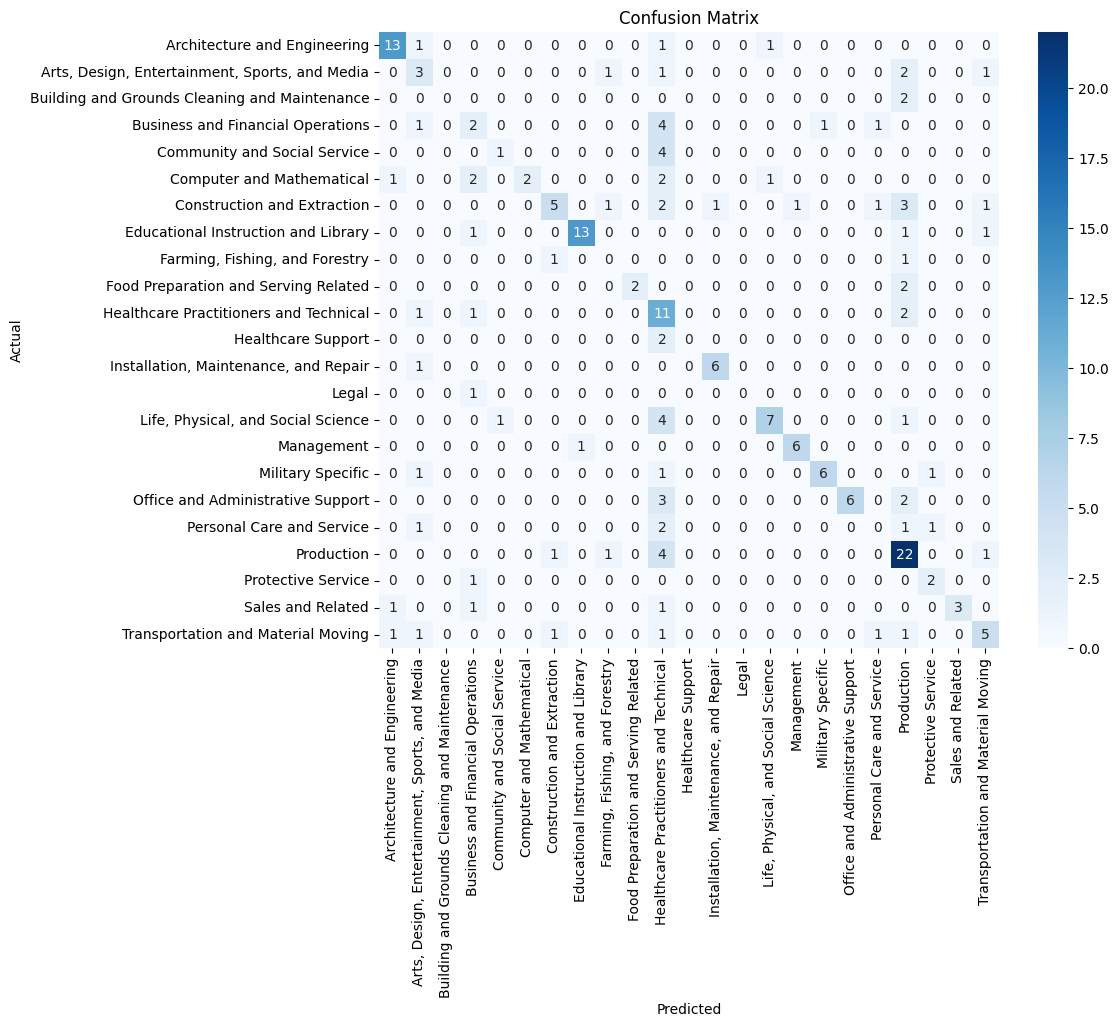

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


2. Job Family Clustering
Objective: Group occupations into clusters based on their similarities, which may reveal new job families or subcategories.

Steps:

Feature Extraction: Extract features from the occupation names using text vectorization techniques.
Clustering Algorithm: Apply clustering algorithms such as K-Means, DBSCAN, or hierarchical clustering.
Evaluation: Evaluate the clusters using silhouette score or other clustering validation metrics.
Visualization: Visualize the clusters to gain insights into the grouping of occupations.

3. Exploratory Data Analysis (EDA)
Objective: Perform comprehensive EDA to uncover patterns, trends, and insights about the distribution of occupations and job families.

Steps:

Descriptive Statistics: Generate descriptive statistics for occupations and job families.
Visualization: Create various visualizations (e.g., bar plots, pie charts, word clouds) to understand the distribution and relationships between occupations and job families.
Insights: Summarize key findings and insights from the EDA.

4. Job Family Trend Analysis
Objective: Analyze trends in job families over time if your dataset includes temporal data (e.g., year of data collection).

Steps:

Data Preparation: Aggregate data by job family and time period.
Trend Analysis: Use time series analysis techniques to identify trends and patterns in job families.
Visualization: Visualize the trends using line charts or area charts.